In [1]:
# Questions we will be answering in this project:
# 1. What was the change in price of the stock over time?
# 2. What was the daily return of the stock on average?
# 3. What was the moving average of the various stocks?
# 4. What was the correlation between different stocks' closing prices?
# 4. What was the correlation between different stocks' daily returns?
# 5. How much value do we put at risk by investing in a particular stock?
# 6. How can we attempt to predict future stock behavior?

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  #this will just set the background to graphs as a white grid
#matplotlib inline

In [24]:
# this import allows us to read stock market data from google and yahoo
from pandas_datareader.data import DataReader

In [6]:
# this will allow us to obtain the date and time of our data grab
from datetime import datetime

In [7]:
# this is imported so that we dont have to worry about including floats in our division operations
from __future__ import division

In [9]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [18]:
# this will set the end as the current date, and the start as the current month and day of the previous year
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [25]:
# the use of 'global' will turn every entry 'stock' into a global variable, so 'AAPL','GOOG' etc
# will be global variables. the 'DataReader' will take the stock and get the stock information between
# the start and end dates
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [27]:
# so now if we call GOOG we can see that its a variable that contains its stock information
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-30,1176.520020,1163.520020,1167.829956,1163.689941,1556300,1163.689941
2018-01-31,1173.000000,1159.130005,1170.569946,1169.939941,1538700,1169.939941
2018-02-01,1174.000000,1157.520020,1162.609985,1167.699951,2412100,1167.699951
2018-02-02,1123.069946,1107.277954,1122.000000,1111.900024,4857900,1111.900024
2018-02-05,1110.000000,1052.030029,1090.599976,1055.800049,3798300,1055.800049


In [28]:
# to get a feel for the data
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,189.247540,185.362778,187.304484,187.304596,3.456395e+07,186.239301
std,22.526814,22.404778,22.462043,22.490915,1.501107e+07,22.546966
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,142.190002
25%,172.987495,168.525005,170.572506,169.937504,2.375438e+07,169.195141
50%,187.349998,184.845001,186.204994,185.955002,3.189075e+07,184.916672
75%,209.312500,205.632496,207.299999,207.645000,4.092332e+07,206.771034
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


In [29]:
# using this we can see what our data will look like, and if there are any missing values
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-01-30 to 2019-01-30
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


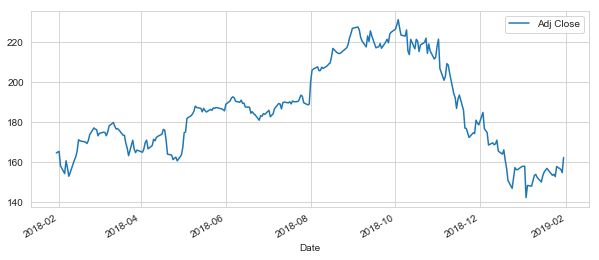

In [34]:
# lets take a look at the adjusted closing price over the past year for the AAPL stock
# apple stock rose right around the time of their keynote address in September to announce
# their new iphone.
AAPL['Adj Close'].plot(legend='True',figsize=(10,4))

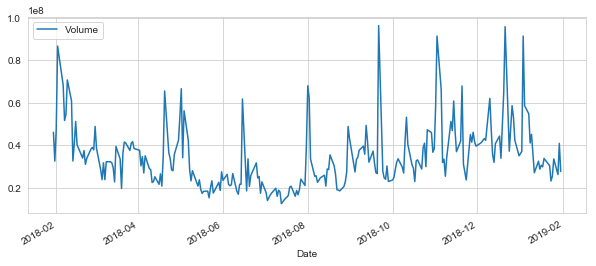

In [36]:
# the volume of a stock is the number of shares that changed hands during a given day
AAPL['Volume'].plot(legend='True',figsize=(10,4))

In [41]:
# now lets calculate the rolling mean, which is the mean over the course of the past x amount of days
# adjust each day. so a 5 day rolling mean is the mean of a value over the past 5 days, and for the next
# day the 5 day period is adjust such that the previous last day is dropped.
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))  #this will set the contents of ma_day to a string
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma).mean() #this will create a column in AAPL equal to
                                                                  #the rolling mean, which is a pandas function

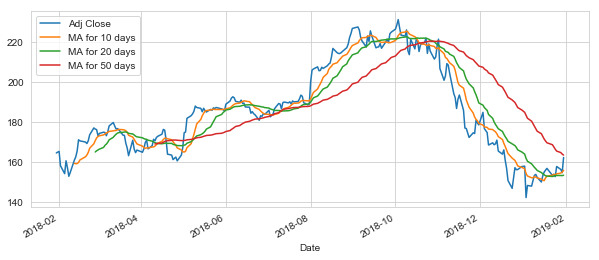

In [44]:
# a plot of the rolling averages gainst the adjusted closing value
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

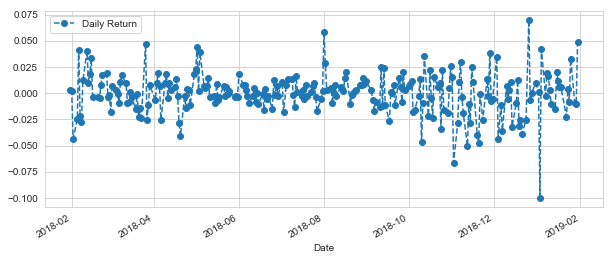

In [52]:
# now we know the daily values of a stock and its general trend. but what about the price fluctuation 
# during the day? lets plot the daily return.

# this will calculate a percent change
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# plotting the daily returns
AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

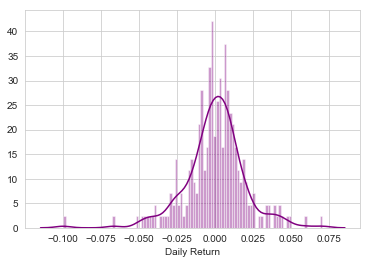

In [61]:
# the above graph is nice but not that useful, lets see the distribution of daily returns
# on a histogram to see how often one would get a positive return

# this can also be used
# AAPL['Daily Return'].hist(bins=100)

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [62]:
# this will gather the adjusted close value for all stocks in the list into a dataframe
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-30,164.500336,1437.819946,1163.689941,91.161865
2018-01-31,164.953522,1450.890015,1169.939941,93.393242
2018-02-01,165.298355,1390.000000,1167.699951,92.656006
2018-02-02,158.126022,1429.949951,1111.900024,90.218201
2018-02-05,154.175354,1390.000000,1055.800049,86.502533


In [63]:
# this will give us the daily return for all the tech stocks
tech_rets = closing_df.pct_change()

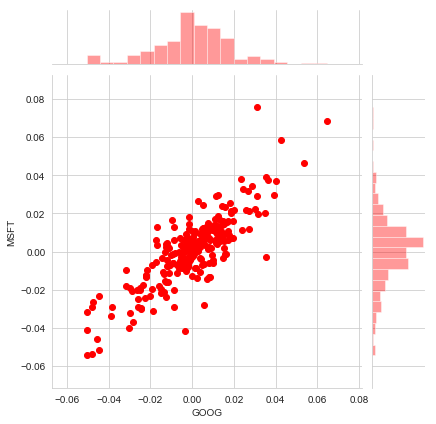

In [71]:
# to compare two stock we will use a join plot. this will show any sort of correlation
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='red')

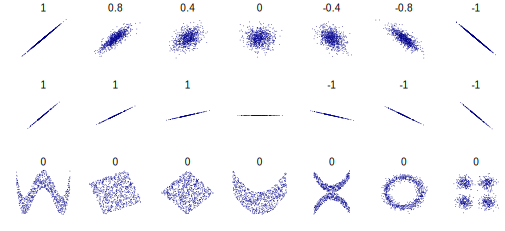

In [73]:
# examples of correlations
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [75]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-30,NaN,NaN,NaN,NaN
2018-01-31,0.002755,0.009090,0.005371,0.024477
2018-02-01,0.002090,-0.041967,-0.001915,-0.007894
2018-02-02,-0.043390,0.028741,-0.047786,-0.026310
2018-02-05,-0.024984,-0.027938,-0.050454,-0.041185


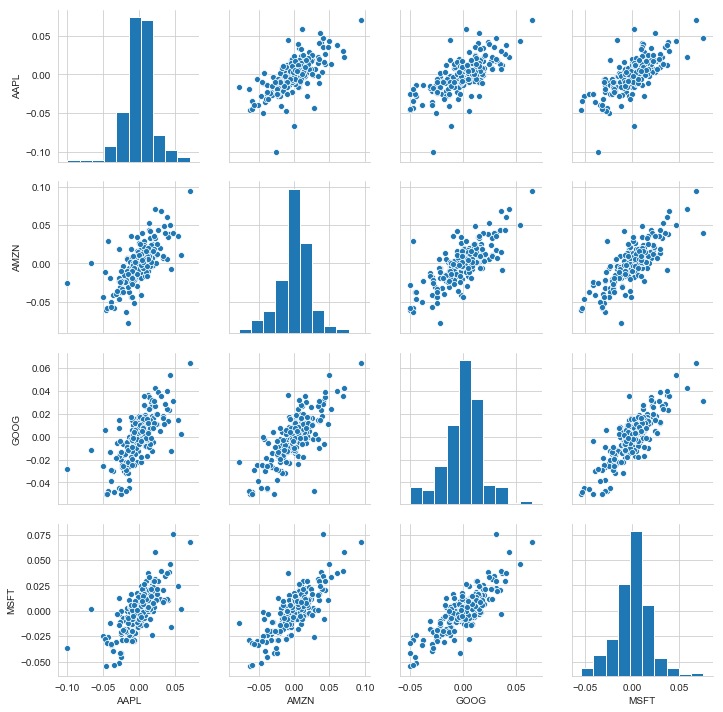

In [76]:
# to see a visual comparison of all the stocks, use pairplot
sns.pairplot(tech_rets.dropna())

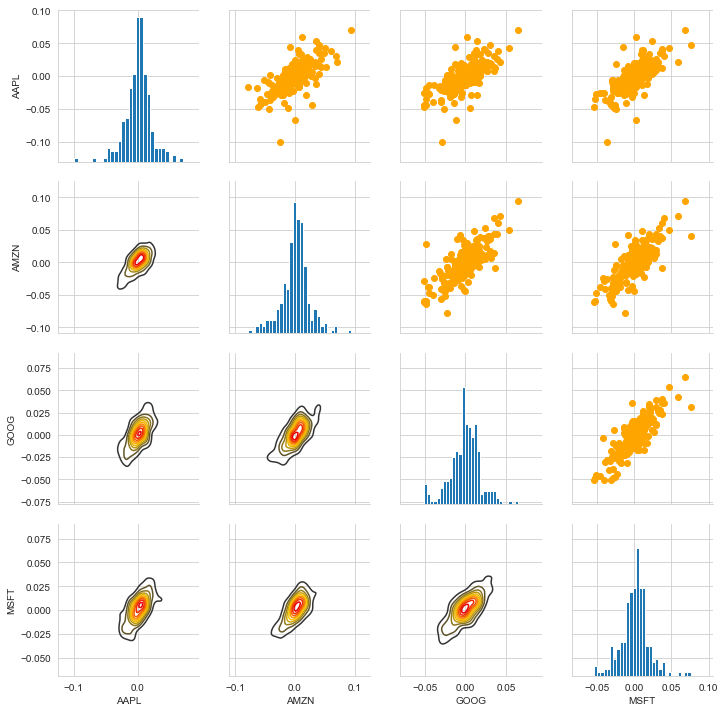

In [82]:
# PairGrid can be used for full control over the brid, including the upper and lower triangles and
# the diagonal
returns_fig = sns.PairGrid(tech_rets.dropna())

# this will determine what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='orange')

# choose a different type of plot for lower triangle
returns_fig.map_lower(sns.kdeplot,cmap='hot_d')

# now to adjust the diagonal
returns_fig.map_diag(plt.hist,bins=30)

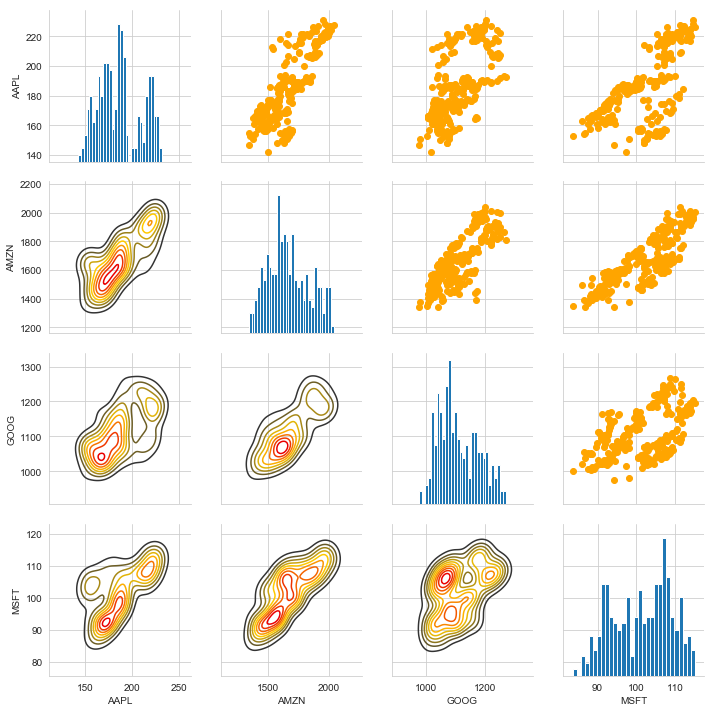

In [83]:
# this is another way to visualize the relations
returns_fig = sns.PairGrid(closing_df)

# this will determine what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='orange')

# choose a different type of plot for lower triangle
returns_fig.map_lower(sns.kdeplot,cmap='hot_d')

# now to adjust the diagonal
returns_fig.map_diag(plt.hist,bins=30)

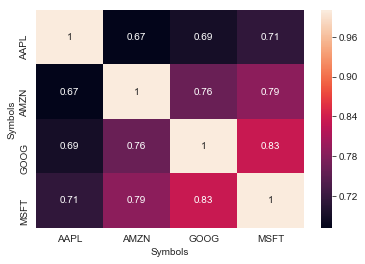

In [87]:
# to see the actual correlation numbers between the stocks
sns.heatmap(tech_rets.dropna().corr(),annot=True)

# what we see in the graphs hold true below, that google and msft have the strongest
# and amazon and apple have the weakest correlation

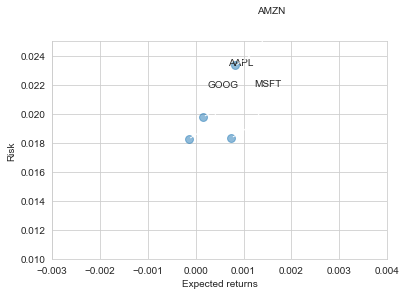

In [90]:
# we can analyze risk by comparing the expected return with the standard deviation of the daily returns
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

-0.03159469020707206

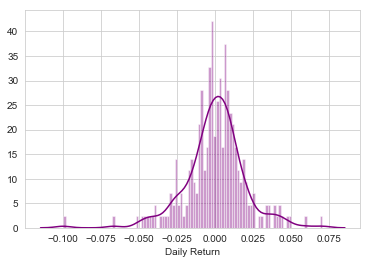

In [93]:
# We can treat value at risk as the amount of money we could expect to lose 
# for a given confidence interval

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

# The 0.05 empirical quantile of daily returns is at -0.0315. That means that with 95% confidence, 
# our worst daily loss will not exceed 3.15%. If we have a 1 million dollar investment, our one-day
# 5% VaR is 0.0315 * 1,000,000 = $31,500. 95% of the times, the maximum amount of money we'll lose
# is 3.15% of our investment. only 5% of the times we'll lose more.

In [94]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [95]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

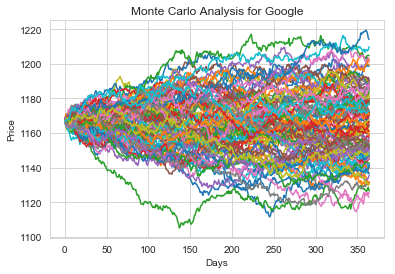

In [97]:
# Get start price from GOOG.head()
start_price = 1167

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [98]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

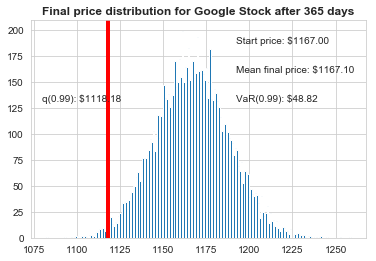

In [99]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
# We have looked at the 1% empirical quantile of the final price distribution to estimate 
# the Value at Risk for the Google stock, which looks to be $48.82 for every investment of 1167.00 
# (the price of one inital google stock). This basically menas for every initial stock you purchase 
# your putting about $48.82 at risk 99% of the time from our Monte Carlo Simulation.